This notebook contains certain test for comparison with real data for the project for Complex system simulation, Complex financial networks

In [3]:
# imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
import os
import time
import datetime
import pickle
import argparse
import itertools
from typing import Dict, List, Any, Tuple
import doctest
import pandas as pd
import powerlaw
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import custom_functions_adj_saving_func as cm

First, we need to get standard deviation of the 'FEDFUNDS' values in the provided CSV file

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_path = 'E:\CLS\FinancialNetwork\Real data\FEDFUNDS.csv'
data = pd.read_csv(csv_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,DATE,FEDFUNDS
0,1970-07-01,7.21
1,1970-08-01,6.62
2,1970-09-01,6.29
3,1970-10-01,6.20
4,1970-11-01,5.60


In [5]:
# Calculate the standard deviation of the 'FEDFUNDS' column
std_dev = data['FEDFUNDS'].std()

std_dev

3.5699004438176827

We need logic to account for when a node dies and what then happens to the exposure of the other nodes, the function below does this:

# First run

In [6]:
# Parameters for the simulation
N_agents = 100
time_steps = 200# Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = std_dev  # Here we Standard deviation for Brownian motion
sigma_intrestrate = 1 # Here we implement the value from the real data
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'exposure'



# running time 1 pass with these params: 900 seconds

# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode, link_formation_mode = link_formation_mode, create_new_node_mode = create_new_node_mode, bankruptcy_mode = bankruptcy_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

# Visual tests of network behavior

In [7]:
N_agents = 500
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = std_dev  # Standard deviation for Brownian motion
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'


# Running the simulator
graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = cm.financial_network_simulator(N_agents = N_agents, time_steps = time_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold, swap_exposure_threshold = swap_exposure_threshold, time_to_maturity = time_to_maturity , link_threshold_mode = link_threshold_mode, link_formation_mode = link_formation_mode, create_new_node_mode = create_new_node_mode, bankruptcy_mode = bankruptcy_mode)
# graph, exposures_over_time, num_bankrupt_agents_over_time, simulated_prices, links_over_time, total_abs_exposure_in_edge_weights, node_population_over_time = financial_network_simulator(N_agents = N_agents, num_steps = num_steps, sigma_exposure_node = sigma_exposure_node, sigma_intrestrate = sigma_intrestrate, delta_t = delta_t, threshold_v = threshold_v, linking_threshold = linking_threshold)

timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 58
timestep 59
timestep 60
timestep 61
timestep 62
timestep 63
timestep 64
timestep 65
timestep 66
timestep 67
timestep 68
timestep 69
timestep 70
timestep 71
timestep 72
timestep 73
timestep 74
timestep 75
timestep 76
timestep 77
timestep 78
timestep 79
timestep 80
timestep 81
timestep 82
timestep 83
ti

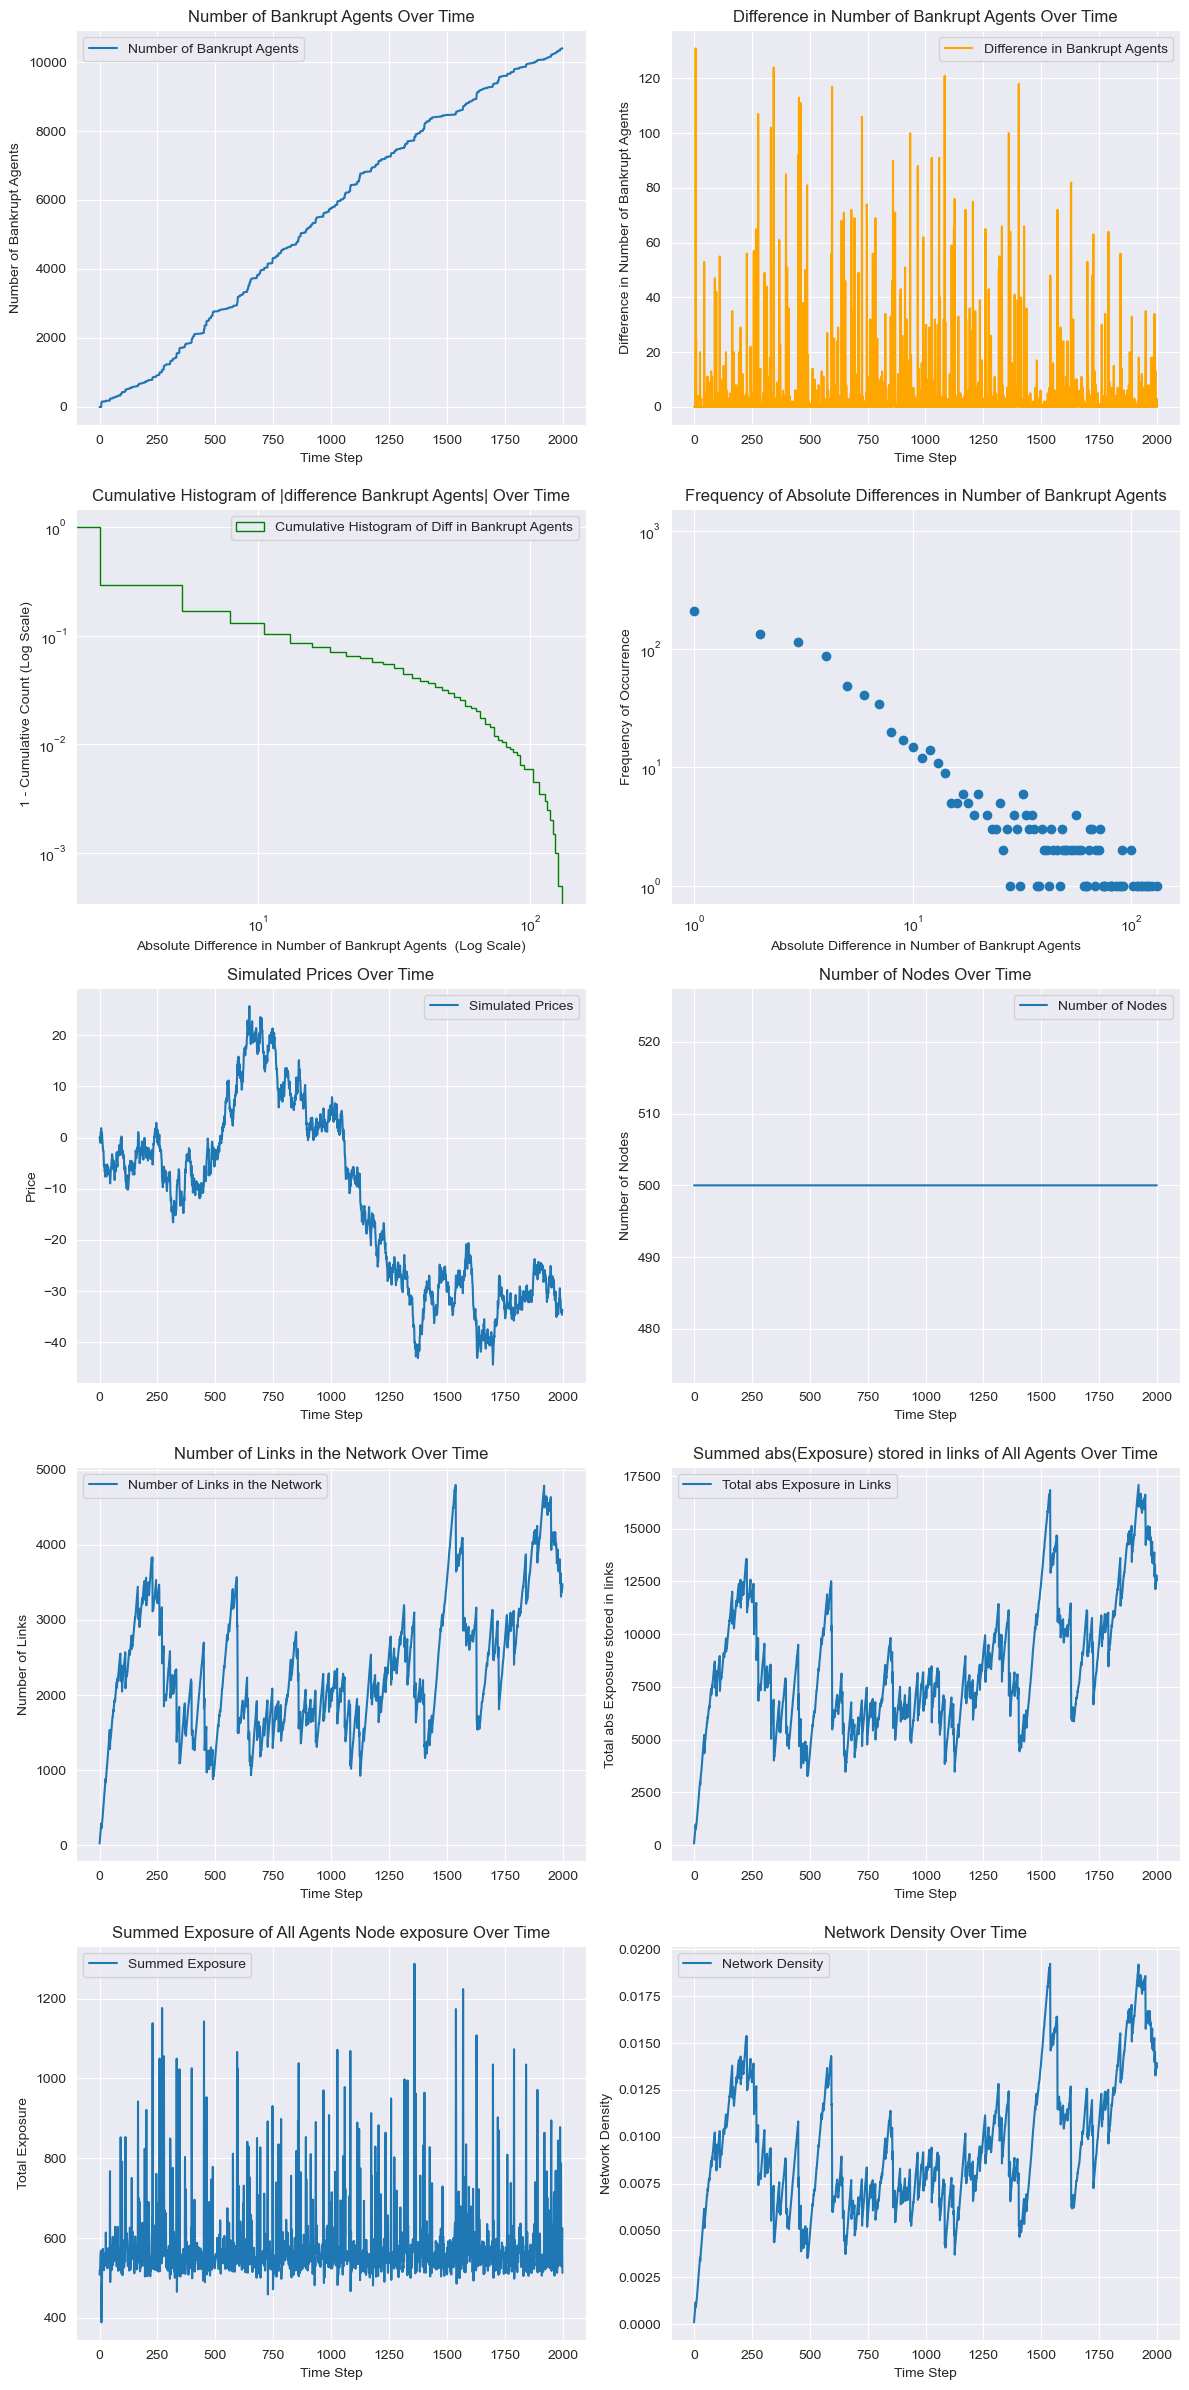

In [8]:
cm.plot_financial_network_results(num_bankrupt_agents_over_time= num_bankrupt_agents_over_time, node_population_over_time=node_population_over_time, links_over_time=links_over_time, total_abs_exposure_in_edge_weights=total_abs_exposure_in_edge_weights, exposures_over_time=exposures_over_time, simulated_prices=simulated_prices)

In [9]:
# Multiple run simulator

In [11]:
# Varying sigma_exposure_node, using papers model (link_formation_mode = 'random link logic' singly and bankruptcy_mode = 'exposure')

runs = 10
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = std_dev
sigma_intrestrate = 1
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'random link logic'
bankruptcy_mode = 'exposure'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-02-01 16:02:53 - Progress: 2/10 (20.00%) - Estimated Time Remaining: 0:00:32
2024-02-01 16:03:01 - Progress: 3/10 (30.00%) - Estimated Time Remaining: 0:00:36
2024-02-01 16:03:09 - Progress: 4/10 (40.00%) - Estimated Time Remaining: 0:00:35
2024-02-01 16:03:18 - Progress: 5/10 (50.00%) - Estimated Time Remaining: 0:00:32
2024-02-01 16:03:26 - Progress: 6/10 (60.00%) - Estimated Time Remaining: 0:00:26
2024-02-01 16:03:34 - Progress: 7/10 (70.00%) - Estimated Time Remaining: 0:00:20
2024-02-01 16:03:42 - Progress: 8/10 (80.00%) - Estimated Time Remaining: 0:00:14
2024-02-01 16:03:50 - Progress: 9/10 (90.00%) - Estimated Time Remaining: 0:00:07
2024-02-01 16:03:59 - Progress: 10/10 (100.00%) - Estimated Time Remaining: 0:00:00
2024-02-01 16:04:08 - Progress: 11/10 (110.00%) - Estimated Time Remaining: -1 day, 23:59:53
Saved results to 300_2000_1_3.5699004438176827_1_5_1_3_400_hard cutoff_random link logic_exposure_20240201160408.csv
Saved all results to simulation_results_random lin

In [12]:
# Varying sigma_exposure_node, using our model (link_formation_mode = 'divide exposure singly' singly and bankruptcy_mode = 'intrest_rate')

runs = 10
N_agents = 300
time_steps = 2000 # Number of simulation steps
delta_t = 1 # Time increment for Brownian motion
sigma_exposure_node = 1
sigma_intrestrate = std_dev
threshold_v = 5  # Bankruptcy threshold
linking_threshold = 1 # Threshold for forming links
swap_exposure_threshold = 3
create_new_node_mode = True
time_to_maturity = 400
link_threshold_mode = 'hard cutoff'
link_formation_mode = 'divide exposure singly'
bankruptcy_mode = 'intrest_rate'

data_of_multirun = cm.multi_parameter_financial_network_simulator(
    runs=runs, 
    N_agents_list=[N_agents], 
    num_steps_list=[time_steps], 
    delta_t_list=[delta_t], 
    sigma_exposure_node_list=[sigma_exposure_node],  
    sigma_intrestrate_list=[sigma_intrestrate], 
    threshold_v_list=[threshold_v], 
    linking_threshold_list=[linking_threshold], 
    swap_exposure_threshold_list=[swap_exposure_threshold], 
    time_to_maturity_list=[time_to_maturity], 
    create_new_node_mode=create_new_node_mode, 
    link_formation_mode=link_formation_mode, 
    bankruptcy_mode=bankruptcy_mode, 
    link_threshold_mode_list=[link_threshold_mode]
)

2024-02-01 16:09:20 - Progress: 2/10 (20.00%) - Estimated Time Remaining: 0:20:48
2024-02-01 16:14:28 - Progress: 3/10 (30.00%) - Estimated Time Remaining: 0:24:05
2024-02-01 16:19:44 - Progress: 4/10 (40.00%) - Estimated Time Remaining: 0:23:23
2024-02-01 16:24:53 - Progress: 5/10 (50.00%) - Estimated Time Remaining: 0:20:44
2024-02-01 16:29:49 - Progress: 6/10 (60.00%) - Estimated Time Remaining: 0:17:07
2024-02-01 16:34:53 - Progress: 7/10 (70.00%) - Estimated Time Remaining: 0:13:10
2024-02-01 16:40:05 - Progress: 8/10 (80.00%) - Estimated Time Remaining: 0:08:59
2024-02-01 16:45:15 - Progress: 9/10 (90.00%) - Estimated Time Remaining: 0:04:34
2024-02-01 16:50:27 - Progress: 10/10 (100.00%) - Estimated Time Remaining: 0:00:00
2024-02-01 16:55:38 - Progress: 11/10 (110.00%) - Estimated Time Remaining: -1 day, 23:55:20
Saved results to 300_2000_1_1_3.5699004438176827_5_1_3_400_hard cutoff_divide exposure singly_intrest_rate_20240201165538.csv
Saved all results to simulation_results_d